In [86]:
import torch
from torch import nn
import os
import numpy as np
import math

In [87]:

class NavigationNet(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.control_net = torch.nn.Sequential(
            torch.nn.Linear(6, 16),  # Input: [bot_x, bot_y, goal_x, goal_y, world_theta, relative_theta]
            torch.nn.ReLU(),
            torch.nn.Linear(16, 32),
            torch.nn.ReLU(),
            torch.nn.Linear(32, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 32),
            torch.nn.ReLU(),
            torch.nn.Linear(32, 16),
            torch.nn.ReLU(),
            torch.nn.Linear(16, 2), # Output: [L, delta_theta]
            torch.nn.Tanh()  # Tanh activation for bounded output
        )
        
    def forward(self, current_state):
        return self.control_net(current_state)

net = torch.load(r"nav_model.pth")


C:\Users\rahat\AppData\Local\Temp\ipykernel_22376\1467683481.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net = torch.load(r"nav_model.pth")


In [88]:
torch.save(net.state_dict(), "ext_nav_model.pth")

In [89]:
model1 = torch.load(r"ext_nav_model.pth")

for key in model1:
    print(key)


control_net.0.weight
control_net.0.bias
control_net.2.weight
control_net.2.bias
control_net.4.weight
control_net.4.bias
control_net.6.weight
control_net.6.bias
control_net.8.weight
control_net.8.bias
control_net.10.weight
control_net.10.bias


C:\Users\rahat\AppData\Local\Temp\ipykernel_22376\53360204.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model1 = torch.load(r"ext_nav_model.pth")


In [91]:
model2 = torch.load(r"F:\Aerosim-Simulation-Zone\TEST_FILES\New_final_bc_policy.pth")

for key,_ in model2['model_state_dict'].items():
    print(key)

_orig_mod.log_std
_orig_mod.mlp_extractor.policy_net.0.weight
_orig_mod.mlp_extractor.policy_net.0.bias
_orig_mod.mlp_extractor.policy_net.2.weight
_orig_mod.mlp_extractor.policy_net.2.bias
_orig_mod.mlp_extractor.policy_net.4.weight
_orig_mod.mlp_extractor.policy_net.4.bias
_orig_mod.mlp_extractor.policy_net.6.weight
_orig_mod.mlp_extractor.policy_net.6.bias
_orig_mod.action_net.weight
_orig_mod.action_net.bias
_orig_mod.value_net.weight
_orig_mod.value_net.bias


C:\Users\rahat\AppData\Local\Temp\ipykernel_22376\583094147.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model2 = torch.load(r"F:\Aerosim-Simulation-Zone\TEST_FILES\N

In [92]:
# Create a mapping dictionary for the networks
mapping = {
    'control_net.0': 'mlp_extractor.policy_net.0',
    'control_net.2': 'mlp_extractor.policy_net.2',
    'control_net.4': 'mlp_extractor.policy_net.4',
    'control_net.6': 'mlp_extractor.policy_net.6',
    'control_net.8': 'mlp_extractor.policy_net.8',
    'control_net.10': 'action_net.0'
}

# Load both models
model1 = torch.load("ext_nav_model.pth")
model2 = torch.load(r"F:\Aerosim-Simulation-Zone\TEST_FILES\final_bc_policy.pth")

# Create new state dict for model2
new_state_dict = {}

# Handle log_std - initialize it with small negative values for stable training
new_state_dict['log_std'] = torch.ones(model2['model_state_dict']['_orig_mod.log_std'].shape) * -2.0

# Transfer weights and remove '_orig_mod' prefix
for old_key, new_key in mapping.items():
    new_state_dict[f'{new_key}.weight'] = model1[f'{old_key}.weight']
    new_state_dict[f'{new_key}.bias'] = model1[f'{old_key}.bias']

# Save the updated model
torch.save({'model_state_dict': new_state_dict}, "updated_policy.pth")

model3 = torch.load("updated_policy.pth")

for key,_ in model3['model_state_dict'].items():
    print(key)


log_std
mlp_extractor.policy_net.0.weight
mlp_extractor.policy_net.0.bias
mlp_extractor.policy_net.2.weight
mlp_extractor.policy_net.2.bias
mlp_extractor.policy_net.4.weight
mlp_extractor.policy_net.4.bias
mlp_extractor.policy_net.6.weight
mlp_extractor.policy_net.6.bias
mlp_extractor.policy_net.8.weight
mlp_extractor.policy_net.8.bias
action_net.0.weight
action_net.0.bias


C:\Users\rahat\AppData\Local\Temp\ipykernel_22376\3188583688.py:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model1 = torch.load("ext_nav_model.pth")
C:\Users\rahat\App

In [97]:
import matplotlib.pyplot as plt
import torch

def plot_trajectory(net, initial_pos, goal_pos, max_steps=12):
    with torch.no_grad():
        current_pos = initial_pos.clone()
        goal_pos = goal_pos.clone()
        
        theta = torch.zeros_like(current_pos[0])
        positions = []
        
        for stp in range(max_steps):
            delta_pos = goal_pos - current_pos
            relative_theta = torch.atan2(delta_pos[1], delta_pos[0]) - theta

            relative_theta = (relative_theta + np.pi) % (2 * np.pi) - np.pi

            print(np.array([current_pos[0]/10, current_pos[1]/7]), np.array([goal_pos[0]/10, goal_pos[1]/7]), np.array([theta.item()/np.pi, relative_theta.item()/np.pi]))

            net_input = torch.stack([
                current_pos[0]/10, current_pos[1]/7,
                goal_pos[0]/10, goal_pos[1]/7,
                theta/np.pi, relative_theta/np.pi
            ], dim=-1).unsqueeze(0)
            
            controls = net(net_input)[0]
            L = controls[0]
            delta_theta = controls[1]*np.pi

            # print(L, delta_theta, theta, torch.clip(delta_theta, -np.pi/9, np.pi/9))

            theta = theta + delta_theta
            theta = (theta + np.pi) % (2 * np.pi) - np.pi 

            # print("step", stp, " ", np.rad2deg(theta), net_input)
        
            # theta += delta_theta
            movement = torch.stack([
                L * torch.cos(theta),
                L * torch.sin(theta)
            ])
            
            current_pos += movement
            # Append a copy of the numpy array to avoid reference issues
            positions.append(current_pos.cpu().numpy().copy())  # Fixed line

            print(f"Actions: {L.item(), delta_theta.item()/np.pi}")
            # print(np.array([current_pos[0]/10, current_pos[1]/7]), np.array([goal_pos[0]/10, goal_pos[1]/7]), theta.item()/np.pi, relative_theta.item()/np.pi)
            
            if torch.norm(delta_pos) < 0.1:
                break
        
        positions = np.array(positions)
        # Rest of the plotting code remains the same
        plt.figure(figsize=(8, 6))
        plt.plot(positions[:, 0], positions[:, 1], 'b-o', markersize=4, label='Path')
        plt.scatter(positions[0, 0], positions[0, 1], c='green', s=200, marker='*', label='Start')
        plt.scatter(goal_pos[0].item(), goal_pos[1].item(), c='red', s=200, marker='X', label='Goal')
        plt.title("Navigation Trajectory")
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.grid(True)
        plt.axis('equal')
        plt.legend()
        plt.show()


[ 0.00099328 -0.37330168] [-0.19652966 -0.3744186 ] [ 0.         -0.99874009]
Actions: (0.9961563944816589, -1.0000000278275352)
[-0.09862236 -0.37330168] [-0.19652966 -0.3744186 ] [-1.00000003  0.00254189]
Actions: (-0.99410080909729, -0.9915658825674312)
[-0.19799754 -0.37706408] [-0.19652966 -0.3744186 ] [0.00843407 0.27821888]
Actions: (-0.0643571987748146, -0.6148203129395964)


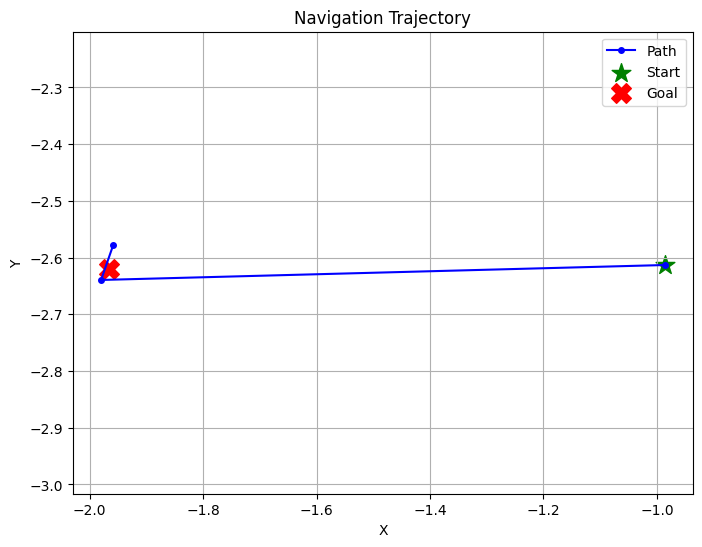

In [102]:
with torch.no_grad():
    initial_torch = torch.tensor([ 0.00099328*10, -0.37330166 *7], dtype=torch.float32)
    goal_torch = torch.tensor([-0.19652966*10, -0.3744186*7], dtype=torch.float32)
    plot_trajectory(net, initial_torch, goal_torch, 60)